In [3]:
%pip install yfinance scikit-learn imbalanced-learn 

Note: you may need to restart the kernel to use updated packages.


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%pip install yfinance scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [6]:
tickerSymbol = 'DIS'
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2022-01-01', end='2023-01-01')

In [7]:
tickerDf['Daily Returns'] = tickerDf['Close'].pct_change()
volatility = tickerDf['Daily Returns'].std()
print(f"Volatility: {volatility:.4f}")


Volatility: 0.0234


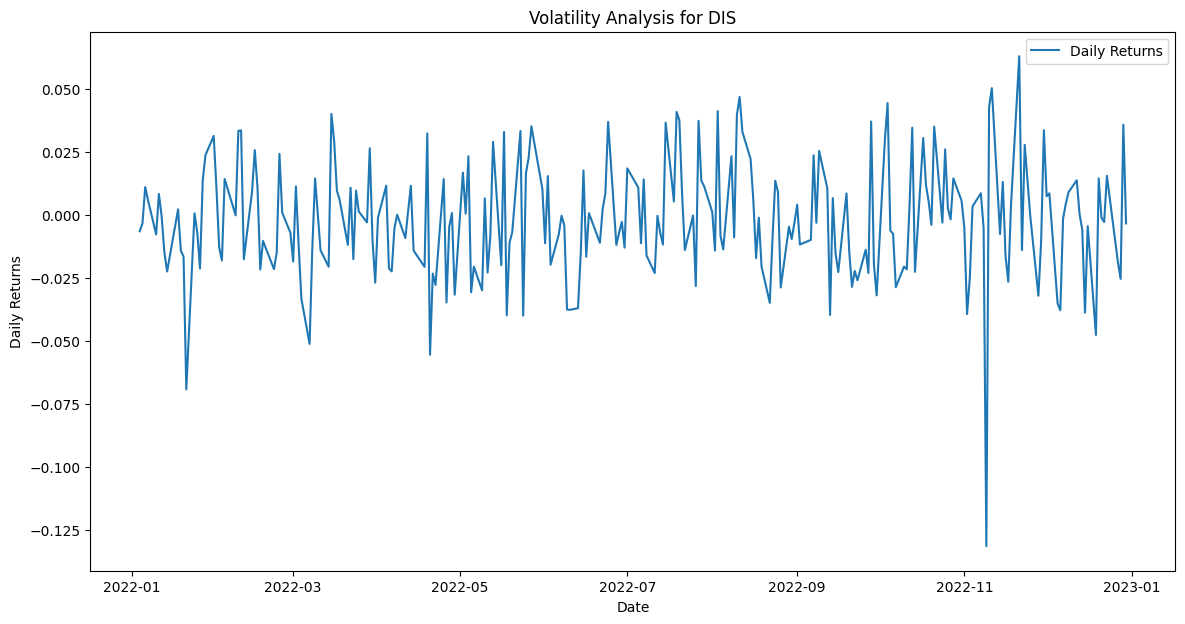

In [8]:
plt.figure(figsize=(14,7))
plt.plot(tickerDf['Daily Returns'], label='Daily Returns')
plt.title(f'Volatility Analysis for {tickerSymbol}')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()


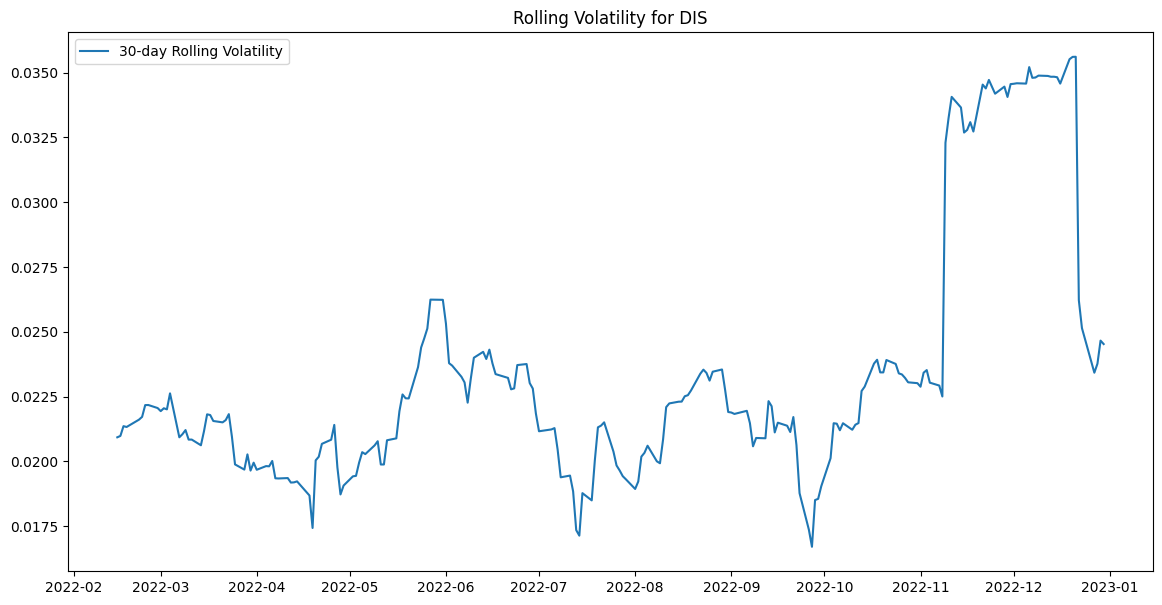

In [9]:
tickerDf['Rolling Volatility'] = tickerDf['Daily Returns'].rolling(window=30).std()
plt.figure(figsize=(14,7))
plt.plot(tickerDf['Rolling Volatility'], label='30-day Rolling Volatility')
plt.title(f'Rolling Volatility for {tickerSymbol}')
plt.legend()
plt.show()

In [10]:
tickerDf['Lagged Returns'] = tickerDf['Daily Returns'].shift(1)
tickerDf['50-Day MA'] = tickerDf['Close'].rolling(window=50).mean()
tickerDf['50-Day Std'] = tickerDf['Close'].rolling(window=50).std()
tickerDf.dropna(inplace=True)
tickerDf['Target'] = (tickerDf['Daily Returns'].shift(-1) > 0).astype(int)

In [11]:
from sklearn.model_selection import train_test_split

features = ['Lagged Returns', '50-Day MA', '50-Day Std']
X = tickerDf[features]
y = tickerDf['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [14]:
balanced_model = LogisticRegression(class_weight='balanced')
balanced_model.fit(X_resampled, y_resampled)
y_pred_balanced = balanced_model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print("Standard Model:")
print(classification_report(y_test, y_pred))
print("\nBalanced Model:")
print(classification_report(y_test, y_pred_balanced))

Standard Model:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        25
           1       0.00      0.00      0.00        16

    accuracy                           0.61        41
   macro avg       0.30      0.50      0.38        41
weighted avg       0.37      0.61      0.46        41


Balanced Model:
              precision    recall  f1-score   support

           0       0.62      0.52      0.57        25
           1       0.40      0.50      0.44        16

    accuracy                           0.51        41
   macro avg       0.51      0.51      0.50        41
weighted avg       0.53      0.51      0.52        41



/Users/anikapatel/Disney-Stock-Volatility-Analysis-/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anikapatel/Disney-Stock-Volatility-Analysis-/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anikapatel/Disney-Stock-Volatility-Analysis-/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont